Clasificación usando ADALINEs
===

* *90 min* | Última modificación: Marzo 21, 2020.

## Definición del problema

Construya un clasificador que permita asignar una de las siguientes clases a un nuevo punto.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

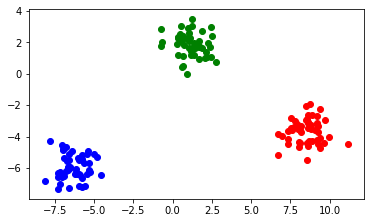

In [2]:
from sklearn.datasets import make_blobs

NPOINTS = 150

X, d = make_blobs(
    n_samples=NPOINTS,
    n_features=2,
    centers=3,
    cluster_std=0.8,
    shuffle=False,
    random_state=12345)

plt.scatter(X[:50,0], X[:50,1], color='red')
plt.scatter(X[50:100,0], X[50:100,1], color='blue')
plt.scatter(X[100:,0], X[100:,1], color='green')
plt.gca().set_aspect('equal', adjustable='box')

## Solución

El problema de clasificación binaria (con clases $C_1$ y $C_2$ dicotómicas) se define de la siguiente manera:


* Cada patrón de entrada tiene la forma $\mathbf{x}=[+1,x_1,x_2,…,x_n ]$.


* Los parámetros del ADALINE son $\mathbf{w}=[w_0,w_1,…,w_n]$ tal que $y=\varphi(\mathbf{w}^T \mathbf{x})$.


* Se desea encontrar el vector $\mathbf{w}$ tal que el ADALINE clasifique correctamente todos los patrones de entrenamiento.


* El error del ADALINE con parámetros $\mathbf{w}$, $E(\mathbf{w})$, es la cantidad de patrones mal clasificados.

El siguiente diagrama representa como sería solucionado el problema mediante un perceptrón binario. Si la salida del perceptrón es $+1$, la correspondiente entrada $(x_1, x_2)$ es clasificada en la clase $C_2$, y si la salida es $-1$ la entrada es clasificada en la clase $C_1$. 

![../assets/AdalineClasificacion-01.png](assets/AdalineClasificacion-01.png)


La frontera de decisión se obtiene al hacer cero la entrada al ADALINE:

$$v=w_0+\sum_{i=}^n w_i x_i =0 $$

* La frontera de decisión es ortogonal al vector de pesos.


* Se puede suponer un vector direccional  y luego despejar el intercepto.


* Para redes de neuronas ADALINE (MADALINE), cada neurona de salida tiene su propia frontera de decisión.

A continuación se presenta la frontera de decisión generada por un ADALINE para la función lógica AND:

![../assets/AdalineClasificacion-02.png](assets/AdalineClasificacion-02.png)

In [3]:
class Adaline:
    def __init__(self, 
                 learning_rate=0.001, # tasa de aprendizaje
                 max_epochs=100,      # número máximo de iteraciones sobre el set de datos
                 shuffle=False,       # mezcla patrones para aprendizaje online
                 random_state=None,   #
                 warm_start=False):   #
        
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.shuffle = shuffle
        self.random_state = random_state
        self.warm_start = warm_start
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X, y):
        
        if not isinstance(X, np.ndarray):
            X = np.array(X)
        if not isinstance(y, np.ndarray):
            d = np.array(y)
        else:
            d = y.copy()
            
        if self.random_state is not None:
            np.random.RandomState(self.random_state)

        if self.coef_ is None or self.warm_start is False:
            self.coef_ = np.random.uniform(-1, 1, X.shape[1])
            
        if self.intercept_ is None  or self.warm_start is False:
            self.intercept_ = np.random.uniform(-1, 1, 1)

        errors2 = []  
        forecasts = []
        
        for epoch in range(self.max_epochs):

            if self.shuffle is True:
                n = list(range(X.shape[0]))
                np.random.shuffle(n)
                X = X[n,:]
                d = d[n]

            for i in range(X.shape[0]):
                u = np.dot(X[i,:], self.coef_) + self.intercept_
                e = (d[i] - u)[0]
                self.coef_ += 2 * self.learning_rate * e * X[i,:]
                self.intercept_ += 2 * self.learning_rate * e 
                errors2.append(e**2)  
                forecasts.append(u)

        return errors2, forecasts
                    
    def predict(self, X):
        if not isinstance(X, np.ndarray):
            X = np.array(X)        
        u = np.dot(X, self.coef_) + self.intercept_
        return u

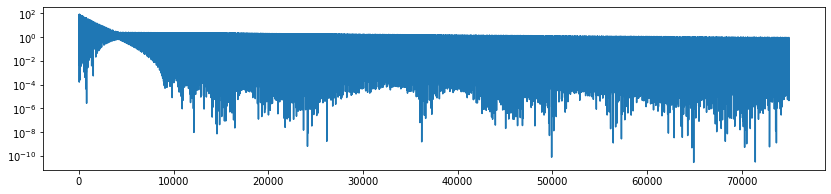

In [4]:
#
# Creación del modelo para la clase d == 0
#
adaline_A = Adaline(
    learning_rate=0.00001,  # tasa de aprendizaje
    max_epochs=500,       # número máximo de iteraciones sobre el set de datos
    shuffle=True,        # mezcla patrones para aprendizaje online
    random_state=123,    # corrida reproducible
    warm_start=False)    # inicia con pesos aleatorios

A = [+1 if u == 0 else -1 for u in d]

errors2, _ = adaline_A.fit(X, A)

plt.figure(figsize=(14,3))
plt.plot(errors2)
plt.yscale('log');

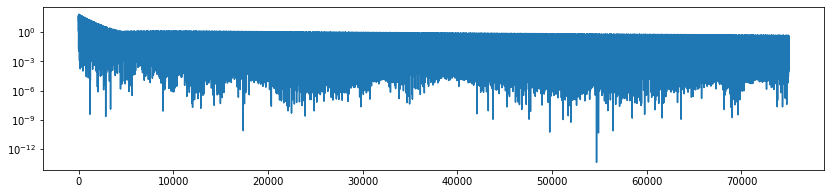

In [5]:
#
# Creación del modelo para la clase d == 1
#
adaline_B = Adaline(
    learning_rate=0.00001,  # tasa de aprendizaje
    max_epochs=500,       # número máximo de iteraciones sobre el set de datos
    shuffle=True,        # mezcla patrones para aprendizaje online
    random_state=123,    # corrida reproducible
    warm_start=False)    # inicia con pesos aleatorios

B = [+1 if u == 1 else -1 for u in d]

errors2, _ = adaline_B.fit(X, B)

plt.figure(figsize=(14,3))
plt.plot(errors2)
plt.yscale('log');

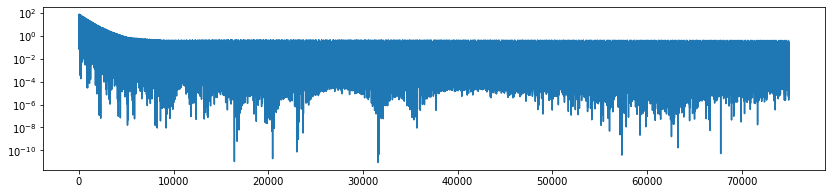

In [6]:
#
# Creación del modelo para la clase d == 2
#
adaline_C = Adaline(
    learning_rate=0.00001, # tasa de aprendizaje
    max_epochs=500,       # número máximo de iteraciones sobre el set de datos
    shuffle=True,        # mezcla patrones para aprendizaje online
    random_state=123,    # corrida reproducible
    warm_start=False)    # inicia con pesos aleatorios

C = [+1 if u == 2 else -1 for u in d]

errors2, _ = adaline_C.fit(X, C)

plt.figure(figsize=(14,3))
plt.plot(errors2)
plt.yscale('log');

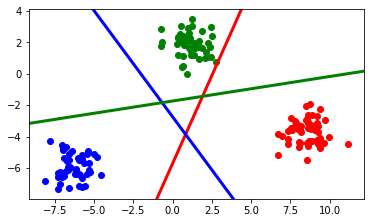

In [7]:
#
# Graficación de las fronteras de decisión
#
plt.scatter(X[:50,0], X[:50,1], color='red')
plt.scatter(X[50:100,0], X[50:100,1], color='blue')
plt.scatter(X[100:,0], X[100:,1], color='green')
plt.gca().set_aspect('equal', adjustable='box')

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xplot = np.linspace(start=xlim[0], stop=xlim[1], num=20)

fronteraA = (- adaline_A.intercept_ / adaline_A.coef_[1] 
             - adaline_A.coef_[0] / adaline_A.coef_[1] * xplot)

fronteraB = (- adaline_B.intercept_ / adaline_B.coef_[1] 
             - adaline_B.coef_[0] / adaline_B.coef_[1] * xplot)

fronteraC = (- adaline_C.intercept_ / adaline_C.coef_[1] 
             - adaline_C.coef_[0] / adaline_C.coef_[1] * xplot)

plt.plot(xplot, fronteraA, color='red', linewidth=3)
plt.plot(xplot, fronteraB, color='blue', linewidth=3)
plt.plot(xplot, fronteraC, color='green', linewidth=3);

plt.xlim(xlim)
plt.ylim(ylim);